In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from mlxtend.plotting import plot_decision_regions

# Read CSV FILE

In [3]:
dataset=pd.read_csv(r"C:\Users\mohan\OneDrive\Desktop\weather_classification_data.csv")

In [4]:
dataset.head(3)

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny

# Detecting and Handling Missing values 

In [5]:
dataset.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


# Encoding Categorical or Object Data Using OneHot Encoding Or LabelEncoding 

In [7]:
p=LabelEncoder()
dataset["Cloud Cover"]=pd.DataFrame(p.fit_transform(dataset["Cloud Cover"]))
dataset["Season"]=pd.DataFrame(p.fit_transform(dataset["Season"]))
dataset["Location"]=pd.DataFrame(p.fit_transform(dataset["Location"]))
dataset["Weather Type"]=pd.DataFrame(p.fit_transform(dataset["Weather Type"]))

In [8]:
dataset.head(3)

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0         14.0        73         9.5               82.0            3   
1         39.0        96         8.5               71.0            3   
2         30.0        64         7.0               16.0            0   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2       3              3.5         1   
1               1011.43         7       1             10.0         1   
2               1018.72         5       1              5.5         2   

   Weather Type  
0             1  
1             0  
2             3

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int64  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int64  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int64  
 10  Weather Type          13200 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.1 MB


# Outlier Detection and Handling Using IQR Method

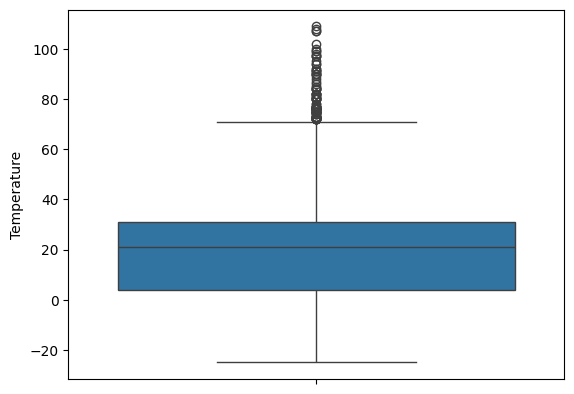

In [10]:
sns.boxplot(dataset["Temperature"])
plt.show()

In [11]:
q1=dataset["Temperature"].quantile(0.25)
q2=dataset["Temperature"].quantile(0.75)
iqr=abs(q2-q1)
range1=[q1-1.5*iqr,q2+1.5*iqr]
dataset.drop(dataset[(dataset["Temperature"]<range1[0]) | (dataset["Temperature"]>range1[1])].index,inplace=True)
dataset.reset_index(drop=True,inplace=True)

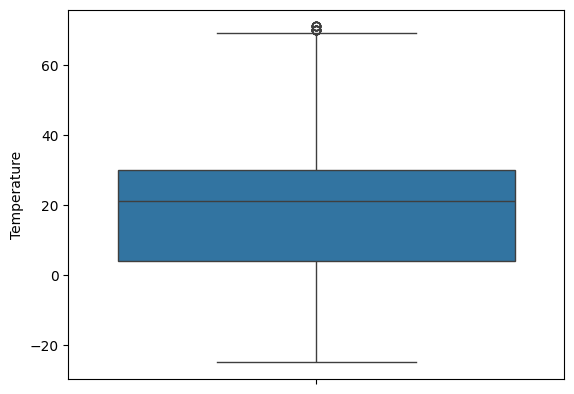

In [12]:
sns.boxplot(dataset["Temperature"])
plt.show()

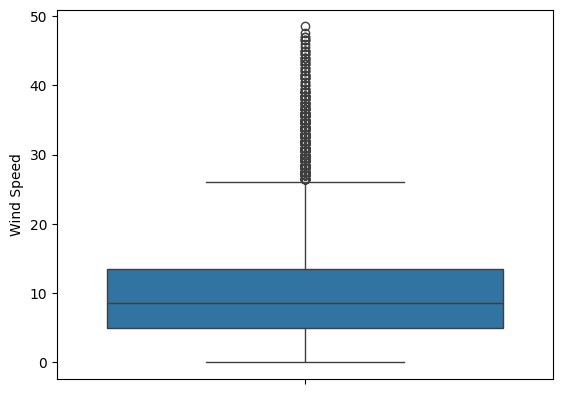

In [13]:
sns.boxplot(dataset["Wind Speed"])
plt.show()

In [14]:
q1=dataset["Wind Speed"].quantile(0.25)
q2=dataset["Wind Speed"].quantile(0.75)
iqr=abs(q2-q1)
range1=[q1-1.5*iqr,q2+1.5*iqr]
dataset.drop(dataset[(dataset["Wind Speed"]<range1[0]) | (dataset["Wind Speed"]>range1[1])].index,inplace=True)
dataset.reset_index(drop=True,inplace=True)

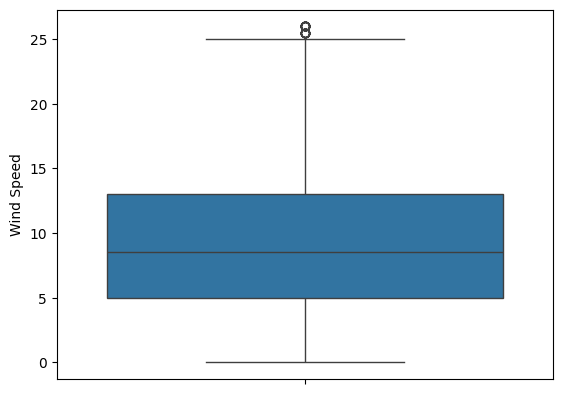

In [15]:
sns.boxplot(dataset["Wind Speed"])
plt.show()

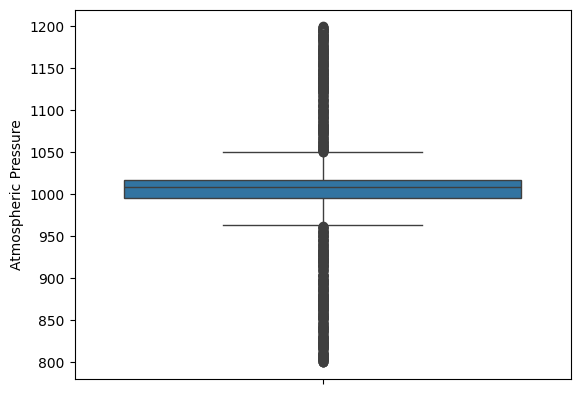

In [16]:
sns.boxplot(dataset["Atmospheric Pressure"])
plt.show()

In [17]:
q1=dataset["Atmospheric Pressure"].quantile(0.25)
q2=dataset["Atmospheric Pressure"].quantile(0.75)
iqr=abs(q2-q1)
range1=[q1-1.5*iqr,q2+1.5*iqr]
dataset.drop(dataset[(dataset["Atmospheric Pressure"]<range1[0]) | (dataset["Atmospheric Pressure"]>range1[1])].index,inplace=True)
dataset.reset_index(drop=True,inplace=True)

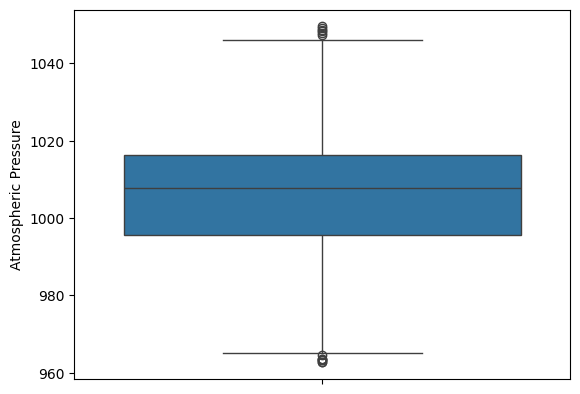

In [18]:
sns.boxplot(dataset["Atmospheric Pressure"])
plt.show()

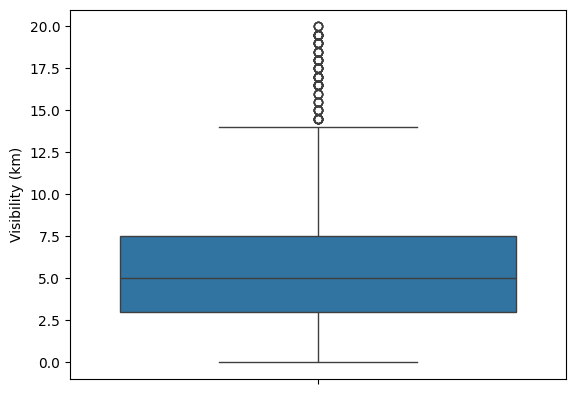

In [19]:
sns.boxplot(dataset["Visibility (km)"])
plt.show()

In [21]:
q1=dataset["Visibility (km)"].quantile(0.25)
q2=dataset["Visibility (km)"].quantile(0.75)
iqr=abs(q2-q1)
range1=[q1-1.5*iqr,q2+1.5*iqr]
dataset.drop(dataset[(dataset["Visibility (km)"]<range1[0]) | (dataset["Visibility (km)"]>range1[1])].index,inplace=True)
dataset.reset_index(drop=True,inplace=True)

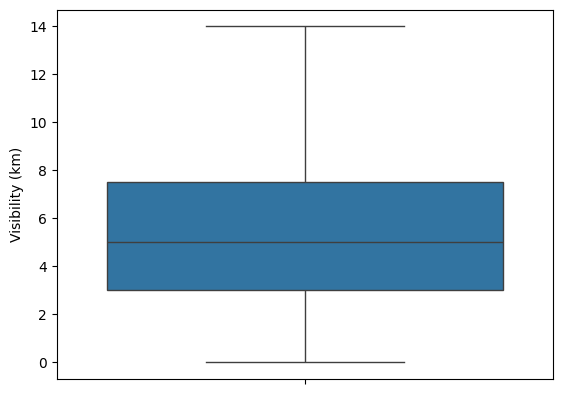

In [22]:
sns.boxplot(dataset["Visibility (km)"])
plt.show()

# handling Duplicates

In [23]:
dataset.drop_duplicates(inplace=True)

# Feature Scaling

In [24]:
print(dataset.describe())

        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  11689.000000  11689.000000  11689.000000       11689.000000   
mean      19.093678     69.505005      9.216956          52.006502   
std       15.920637     19.415532      5.615114          32.056549   
min      -24.000000     20.000000      0.000000           0.000000   
25%        7.000000     59.000000      5.000000          18.000000   
50%       22.000000     70.000000      8.500000          56.000000   
75%       30.000000     84.000000     13.500000          81.000000   
max       71.000000    109.000000     26.000000         109.000000   

        Cloud Cover  Atmospheric Pressure      UV Index        Season  \
count  11689.000000          11689.000000  11689.000000  11689.000000   
mean       1.986911           1006.263816      3.613483      1.877492   
std        1.032621             12.937577      3.601013      1.162623   
min        0.000000            962.880000      0.000000      0.000000   
25% 

In [25]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
dataset["Temperature"]=pd.DataFrame(s.fit_transform(dataset[["Temperature"]]))
dataset["Atmospheric Pressure"]=pd.DataFrame(s.fit_transform(dataset[["Atmospheric Pressure"]]))
dataset["Humidity"]=pd.DataFrame(s.fit_transform(dataset[["Humidity"]]))
dataset["Precipitation (%)"]=pd.DataFrame(s.fit_transform(dataset[["Precipitation (%)"]]))

In [26]:
print(dataset.describe())

        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  1.168900e+04  1.168900e+04  11689.000000       1.168900e+04   
mean   1.154959e-17  3.404089e-17      9.216956      -1.051620e-16   
std    1.000043e+00  1.000043e+00      5.615114       1.000043e+00   
min   -2.706897e+00 -2.549872e+00      0.000000      -1.622406e+00   
25%   -7.596553e-01 -5.410851e-01      5.000000      -1.060874e+00   
50%    1.825584e-01  2.549590e-02      8.500000       1.245820e-01   
75%    6.850724e-01  7.465989e-01     13.500000       9.044872e-01   
max    3.260456e+00  2.034283e+00     26.000000       1.777981e+00   

        Cloud Cover  Atmospheric Pressure      UV Index        Season  \
count  11689.000000          1.168900e+04  11689.000000  11689.000000   
mean       1.986911          8.440316e-15      3.613483      1.877492   
std        1.032621          1.000043e+00      3.601013      1.162623   
min        0.000000         -3.353462e+00      0.000000      0.000000   
25% 

# Relationship Between Various Features  

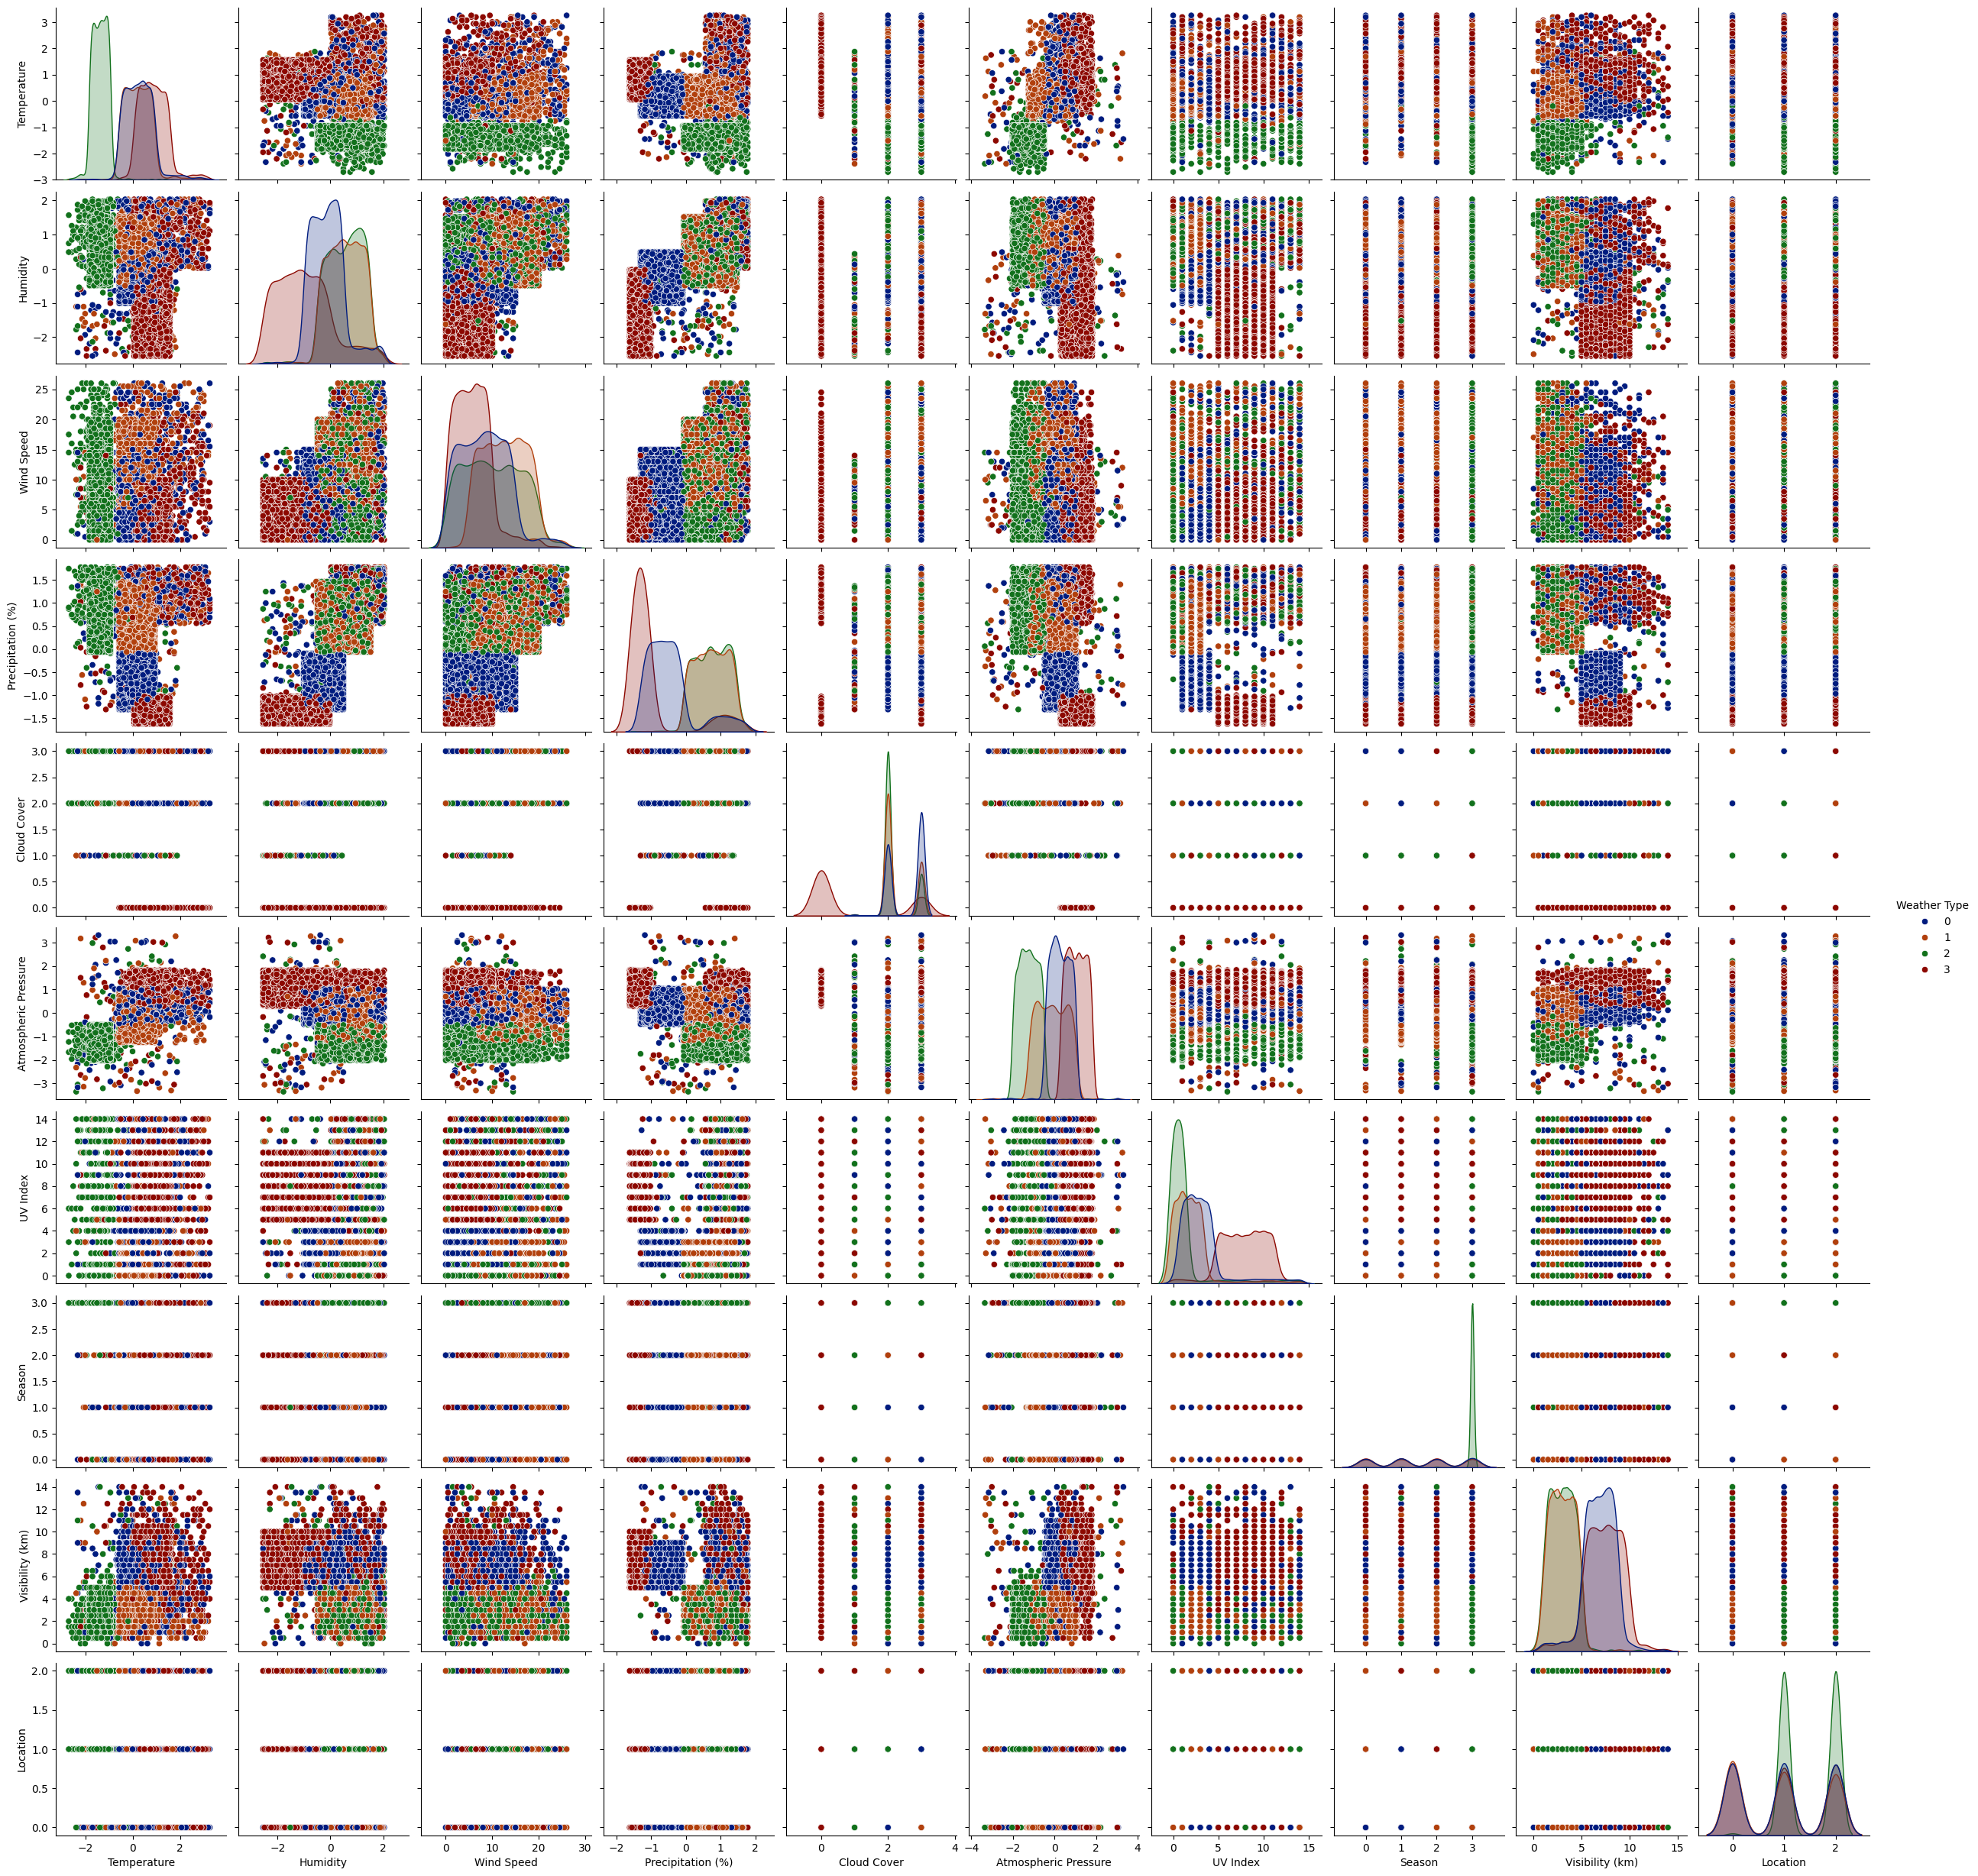

In [27]:
sns.pairplot(dataset,hue="Weather Type",palette="dark")
plt.show()

# Features Distribution

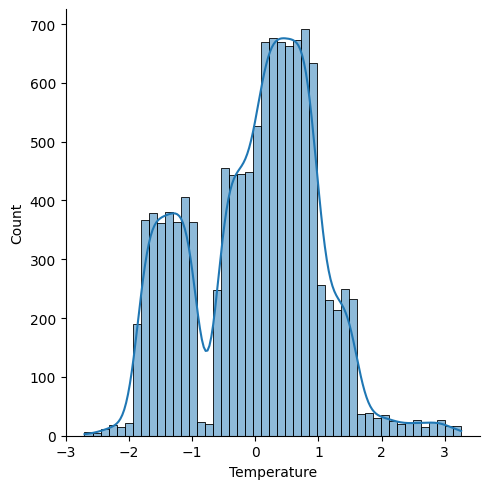

In [29]:
sns.displot(dataset["Temperature"],kde=True)
plt.show()

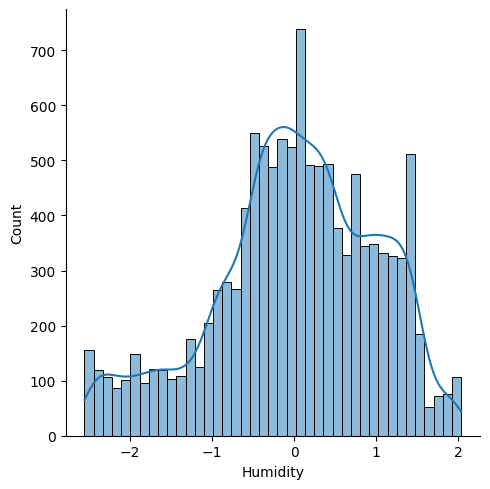

In [31]:
sns.displot(dataset["Humidity"],kde=True)
plt.show()

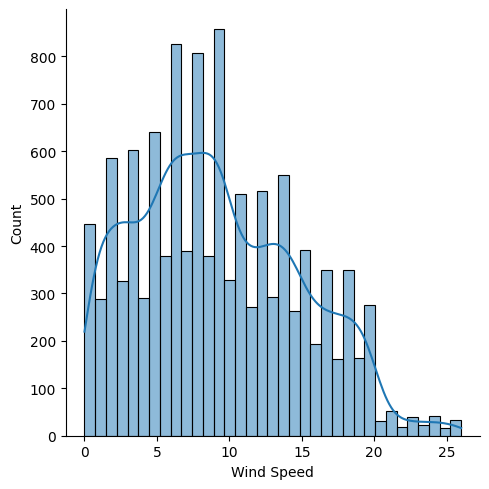

In [32]:
sns.displot(dataset["Wind Speed"],kde=True)
plt.show()

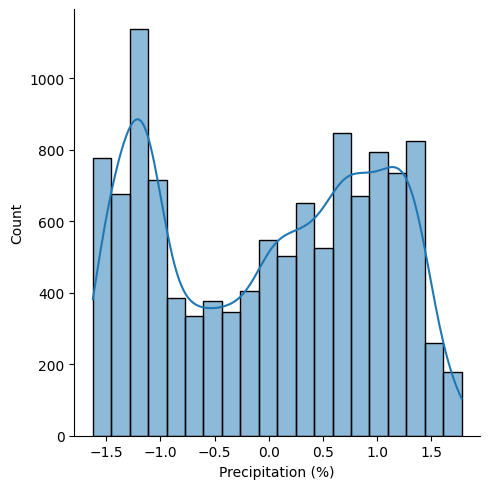

In [33]:
sns.displot(dataset["Precipitation (%)"],kde=True)
plt.show()

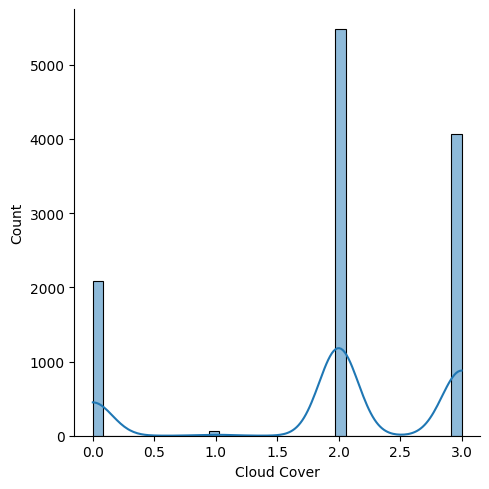

In [34]:
sns.displot(dataset["Cloud Cover"],kde=True)
plt.show()

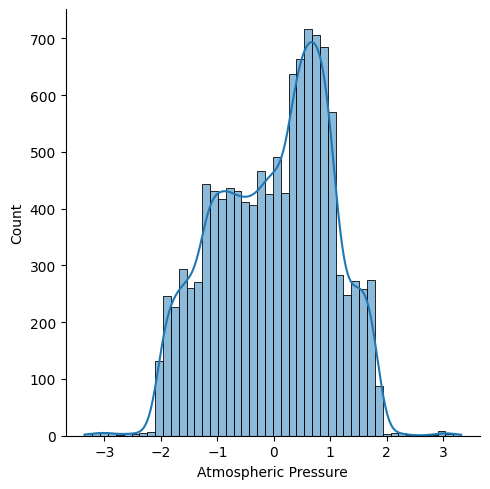

In [35]:
sns.displot(dataset["Atmospheric Pressure"],kde=True)
plt.show()

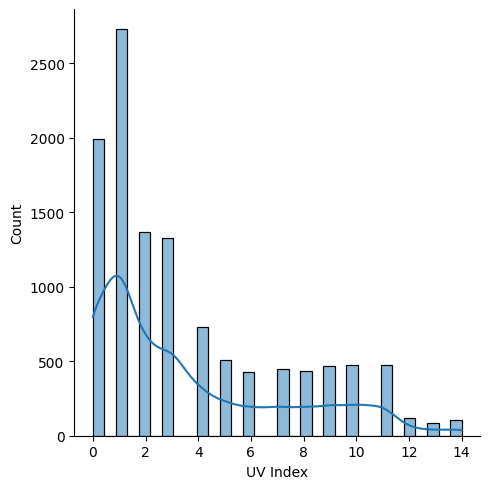

In [36]:
sns.displot(dataset["UV Index"],kde=True)
plt.show()

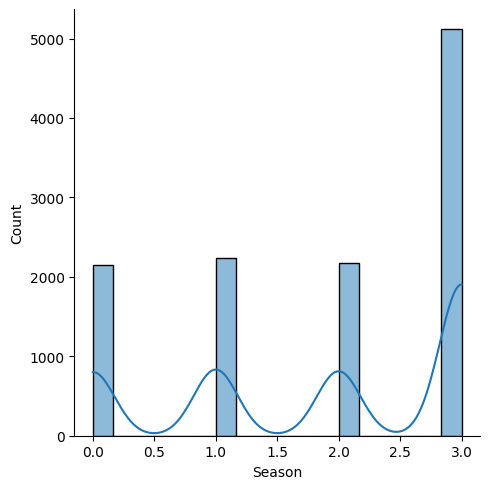

In [37]:
sns.displot(dataset["Season"],kde=True)
plt.show()

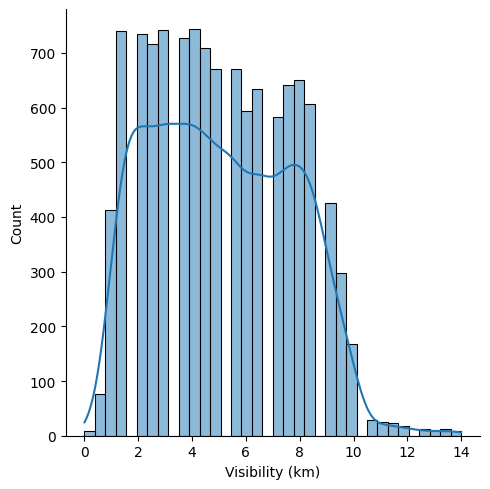

In [38]:
sns.displot(dataset["Visibility (km)"],kde=True)
plt.show()

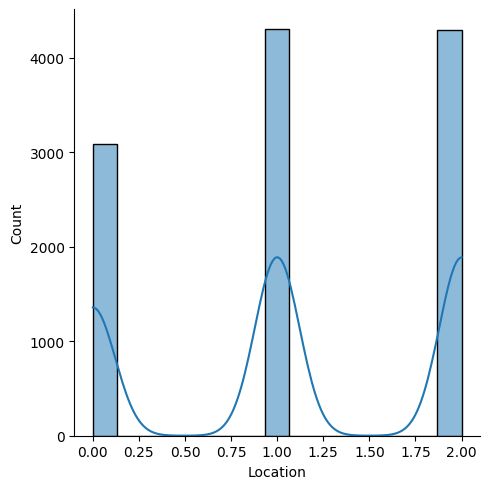

In [39]:
sns.displot(dataset["Location"],kde=True)
plt.show()

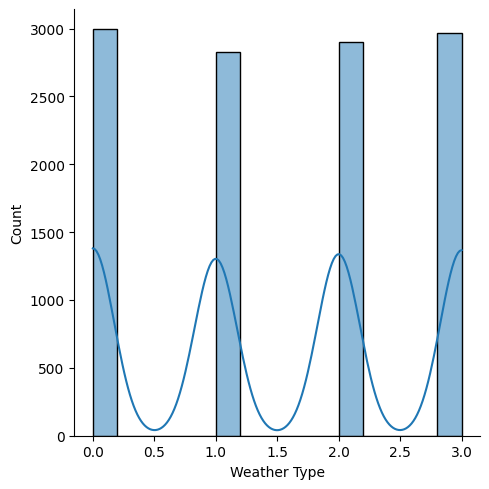

In [40]:
sns.displot(dataset["Weather Type"],kde=True)
plt.show()

# Dividing Independent And Dependent Variable  

In [53]:
x=dataset.iloc[:, :-1]
y=dataset["Weather Type"]

# train test Data Spliting

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [56]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11689 entries, 0 to 11688
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           11689 non-null  float64
 1   Humidity              11689 non-null  float64
 2   Wind Speed            11689 non-null  float64
 3   Precipitation (%)     11689 non-null  float64
 4   Cloud Cover           11689 non-null  int64  
 5   Atmospheric Pressure  11689 non-null  float64
 6   UV Index              11689 non-null  int64  
 7   Season                11689 non-null  int64  
 8   Visibility (km)       11689 non-null  float64
 9   Location              11689 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 913.3 KB
None


# Model Evaluate

# 1)LogisticRegression-Multinomial

In [61]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class="ovr")
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test)*100)

92.61477045908184


C:\Users\mohan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [63]:
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix

f1_score: 92.59092454853025
precision_score: 92.59276418360854
recall_score: 92.61477045908184


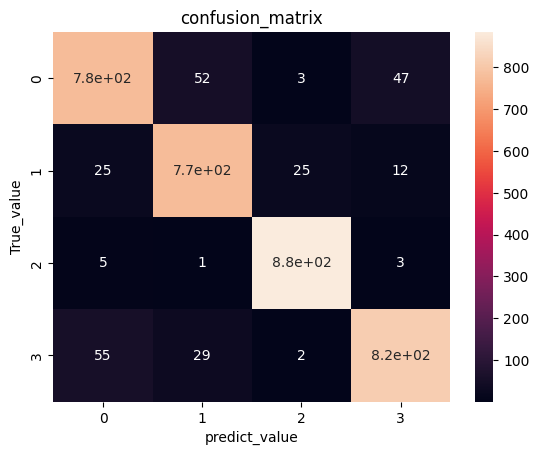

In [81]:
print("f1_score:",f1_score(y_true=y_test,y_pred=lr.predict(x_test),average="weighted")*100)
print("precision_score:",precision_score(y_true=y_test,y_pred=lr.predict(x_test),average="weighted")*100)
print("recall_score:",recall_score(y_true=y_test,y_pred=lr.predict(x_test),average="weighted")*100)
pf=confusion_matrix(y_true=y_test,y_pred=lr.predict(x_test))
sns.heatmap(pf,annot=True)
plt.xlabel("predict_value")
plt.ylabel("True_value")
plt.title("confusion_matrix")
plt.show()

# 2)Navie_Bayes-GaussianNB

In [77]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print("Accuracy:",nb.score(x_test,y_test)*100)

Accuracy: 95.63729683490163


f1_score: 95.63137992135809
precision_score: 95.65322440884819
recall_score: 95.63729683490163


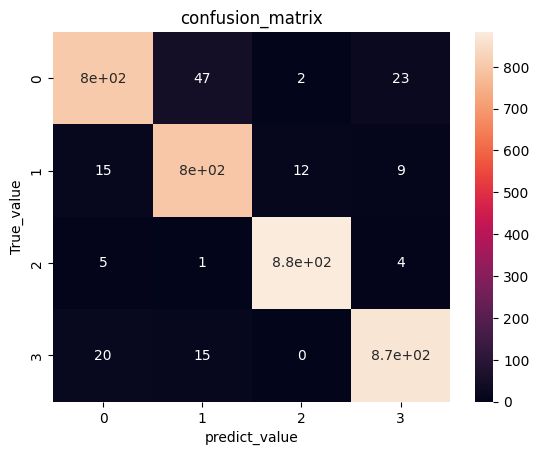

In [82]:
print("f1_score:",f1_score(y_true=y_test,y_pred=nb.predict(x_test),average="weighted")*100)
print("precision_score:",precision_score(y_true=y_test,y_pred=nb.predict(x_test),average="weighted")*100)
print("recall_score:",recall_score(y_true=y_test,y_pred=nb.predict(x_test),average="weighted")*100)
pf1=confusion_matrix(y_true=y_test,y_pred=nb.predict(x_test))
sns.heatmap(pf1,annot=True)
plt.xlabel("predict_value")
plt.ylabel("True_value")
plt.title("confusion_matrix")
plt.show()

# 3)KNN-KNeighborsClassifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
print("Accuracy:",kn.score(x_test,y_test)*100)

Accuracy: 94.9529512403764


f1_score: 94.95109914396936
precision_score: 94.96059695826577
recall_score: 94.9529512403764


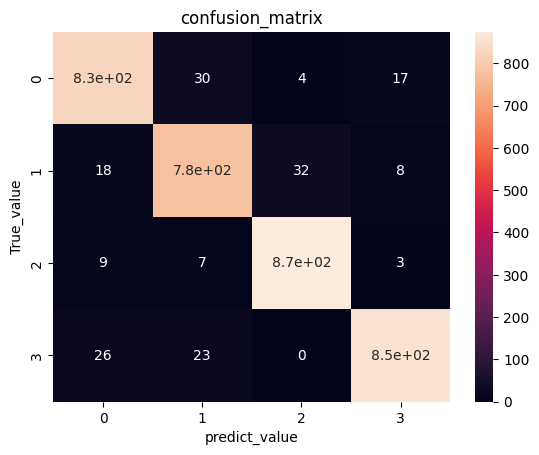

In [90]:
print("f1_score:",f1_score(y_true=y_test,y_pred=kn.predict(x_test),average="weighted")*100)
print("precision_score:",precision_score(y_true=y_test,y_pred=kn.predict(x_test),average="weighted")*100)
print("recall_score:",recall_score(y_true=y_test,y_pred=kn.predict(x_test),average="weighted")*100)
pf2=confusion_matrix(y_true=y_test,y_pred=kn.predict(x_test))
sns.heatmap(pf2,annot=True)
plt.xlabel("predict_value")
plt.ylabel("True_value")
plt.title("confusion_matrix")
plt.show()

# 4)SVM-Classifier

In [91]:
from sklearn.svm import SVC
u=SVC(kernel="poly")
u.fit(x_train,y_train)
print("Accuracy:",u.score(x_test,y_test)*100)

Accuracy: 95.55175363558597


f1_score: 95.55588677373773
precision_score: 95.58092095508874
recall_score: 95.55175363558597


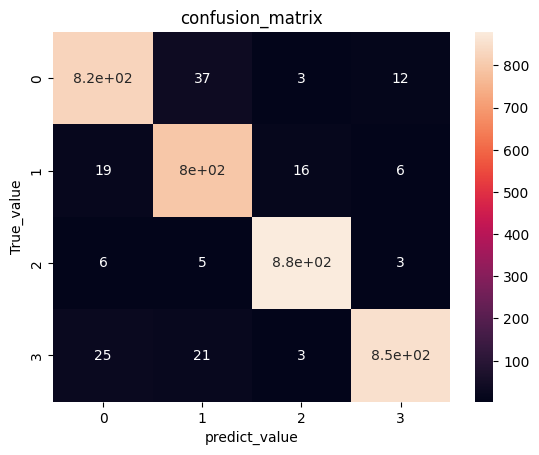

In [92]:
print("f1_score:",f1_score(y_true=y_test,y_pred=u.predict(x_test),average="weighted")*100)
print("precision_score:",precision_score(y_true=y_test,y_pred=u.predict(x_test),average="weighted")*100)
print("recall_score:",recall_score(y_true=y_test,y_pred=u.predict(x_test),average="weighted")*100)
pf3=confusion_matrix(y_true=y_test,y_pred=u.predict(x_test))
sns.heatmap(pf3,annot=True)
plt.xlabel("predict_value")
plt.ylabel("True_value")
plt.title("confusion_matrix")
plt.show()

# 5)DecisionTree-Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)
print("Accuracy:",dt.score(x_test,y_test)*100)

Accuracy: 97.3766752209866


f1_score: 97.38656506695207
precision_score: 97.40733074064329
recall_score: 97.3766752209866


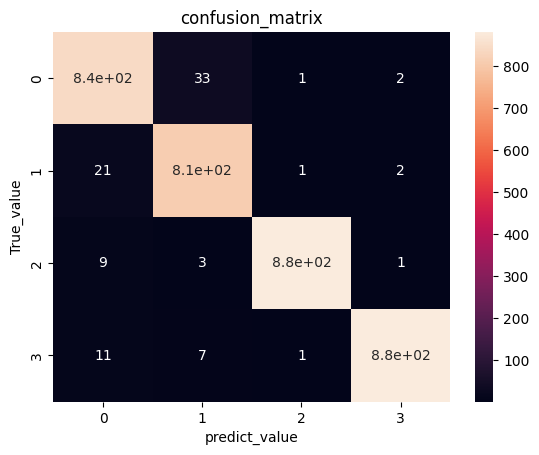

In [96]:
print("f1_score:",f1_score(y_true=y_test,y_pred=dt.predict(x_test),average="weighted")*100)
print("precision_score:",precision_score(y_true=y_test,y_pred=dt.predict(x_test),average="weighted")*100)
print("recall_score:",recall_score(y_true=y_test,y_pred=dt.predict(x_test),average="weighted")*100)
pf4=confusion_matrix(y_true=y_test,y_pred=dt.predict(x_test))
sns.heatmap(pf4,annot=True)
plt.xlabel("predict_value")
plt.ylabel("True_value")
plt.title("confusion_matrix")
plt.show()